# Title

Bike share programs are a type of shared public transporatation system that is considered to be eco-friendly and sustainable. Typically these systems work by allowing people to rent bikes at a station, travel to their destination, and return the bike to another station. Such bike programs are frequently implemented in more densly populated areas such as cities, and have been relatively successful. Majority of revenue is from bike users and the time they borrow a bike. This leads to the question: what factors influences the number of bike trips? Knowing this can allow us to see what business strategies can be used to optimize the conditions in which people use bike share programs and potentially incentivize people to use these more.


In [210]:
import sqlite3
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing Data
To analyze this, we can first obtain some sample data from a bike share program 

In [92]:
# tables are [('station',), ('status',), ('trip',), ('weather',)]
con = sqlite3.connect("database.sqlite")

# get tables
sql_query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor = con.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('station',), ('status',), ('trip',), ('weather',)]


In [93]:
station = pd.read_sql_query("SELECT * from station", con)
#status = pd.read_sql_query("SELECT * from status", con)
trip = pd.read_sql_query("SELECT * from trip", con)
weather = pd.read_sql_query("SELECT * from weather", con)

In [212]:
# Columns in each table
station # id, name, lat, long, dock_count, city, installation_date
#status # station_id, bikes_available, docks_available, time
trip 
"""(['id', 'duration', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name', 'end_station_id',
       'bike_id', 'subscription_type', 'zip_code'],
      dtype='object')"""
weather 
""" (['date', 'max_temperature_f', 'mean_temperature_f', 'min_temperature_f',
       'max_dew_point_f', 'mean_dew_point_f', 'min_dew_point_f',
       'max_humidity', 'mean_humidity', 'min_humidity',
       'max_sea_level_pressure_inches', 'mean_sea_level_pressure_inches',
       'min_sea_level_pressure_inches', 'max_visibility_miles',
       'mean_visibility_miles', 'min_visibility_miles', 'max_wind_Speed_mph',
       'mean_wind_speed_mph', 'max_gust_speed_mph', 'precipitation_inches',
       'cloud_cover', 'events', 'wind_dir_degrees', 'zip_code'],
      dtype='object')"""

trip

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
0,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114,2013-08-29
1,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,2013-08-29
2,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,2013-08-29
3,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,2013-08-29
4,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,2013-08-29
...,...,...,...,...,...,...,...,...,...,...,...,...
669954,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069,2015-08-31
669955,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113,2015-08-31
669956,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,2015-08-31
669957,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,2015-08-31


## Data Cleaning and Manipulation (reword me)

In [18]:
# mark all the stations
map_osm = folium.Map(location=[37.60, -122.29], zoom_start=10)

for index, station_info in station.iterrows():
    tooltip_text = station_info['name'] + "\n"
    folium.Marker(location=[station_info["lat"], station_info["long"]], tooltip=tooltip_text).add_to(map_osm)
    
map_osm

In [95]:
# Convert time from object to datetime
trip["date"] = pd.to_datetime(trip["start_date"]).dt.date
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date
0,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114,2013-08-29
1,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,2013-08-29
2,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,2013-08-29
3,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,2013-08-29
4,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,2013-08-29


## Data Exploration

In [96]:
trips_by_date = trip.groupby(["date"])

start_trips_by_date = []
end_trips_by_date = []

for index, group in trips_by_date:
    trips_per_start_station = group.groupby("start_station_id")
    start_trips_by_date.append(trips_per_start_station["id"].count())
    
    #trips_per_end_station = group.groupby("end_station_id")
    #end_trips_by_date.append(trips_per_end_station["id"].count())

## Data Analysis and Hypothesis Testing

In [123]:
trips = trips_by_date.size()
trips

date
2013-08-29     748
2013-08-30     714
2013-08-31     640
2013-09-01     706
2013-09-02     661
              ... 
2015-08-27    1443
2015-08-28    1220
2015-08-29     342
2015-08-30     331
2015-08-31    1369
Length: 733, dtype: int64

## Predicting [something] with Machine Learning

In [173]:
# Data cleaning

# convert columns to numeric
weather = weather.apply(pd.to_numeric, errors='ignore')
weather['precipitation_inches'] = pd.to_numeric(weather['precipitation_inches'], errors='coerce')
# convert date to datetime
weather["date"] = pd.to_datetime(weather["date"]).dt.date

weather_by_date = weather.groupby("date")


weather_by_date = weather_by_date.mean()
weather_by_date["trips"] = trips
weather_by_date = weather_by_date.drop("zip_code", axis=1)
weather_by_date["day"] = weather_by_date.index
weather_by_date["day"] = pd.to_datetime(weather_by_date["day"])
weather_by_date["day"] = weather_by_date["day"].dt.dayofweek
weather_by_date


,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,trips,day
date,,,,,,,,,,,,,,,,,,,,,
2013-08-29,78.6,70.4,62.8,62.6,60.0,58.0,88.8,73.2,53.0,30.064,...,10.0,10.0,17.8,7.4,21.600000,0.0,4.2,325.8,748,3
2013-08-30,84.6,73.0,62.4,63.4,59.8,55.8,90.8,68.8,42.4,30.054,...,10.0,9.4,19.4,5.6,23.000000,0.0,2.0,181.8,714,4
2013-08-31,76.4,68.0,59.8,59.6,57.2,54.4,88.2,70.8,51.6,29.994,...,10.0,10.0,18.4,7.4,24.500000,0.0,1.0,324.6,640,5
2013-09-01,79.2,70.0,61.0,61.2,57.2,53.6,83.4,66.8,44.4,29.962,...,10.0,10.0,18.6,7.2,21.800000,0.0,2.2,318.8,706,6
2013-09-02,77.4,70.8,64.6,62.8,60.8,58.4,85.8,74.0,58.8,29.972,...,10.0,9.2,18.2,7.4,22.600000,0.0,5.0,311.4,661,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-27,88.6,75.2,61.4,59.6,53.6,43.6,79.0,51.8,23.2,30.062,...,10.6,10.0,18.6,5.2,25.750000,0.0,1.2,319.8,1443,3
2015-08-28,90.8,78.2,64.8,63.8,58.8,53.8,88.6,63.2,33.6,29.952,...,11.4,9.8,21.6,8.0,26.200000,0.0,2.6,317.4,1220,4
2015-08-29,78.4,72.0,65.0,65.6,62.0,54.6,88.6,72.2,51.6,30.016,...,9.8,7.2,18.8,7.8,26.666667,0.0,4.8,308.0,342,5


[Text(0.5, 1.0, 'Trips by Day')]

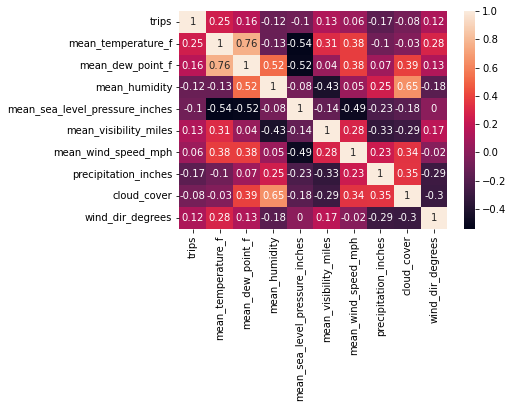

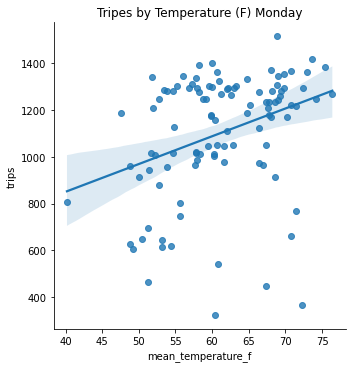

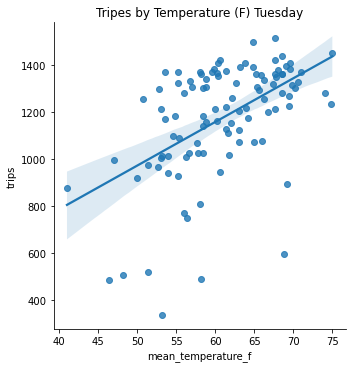

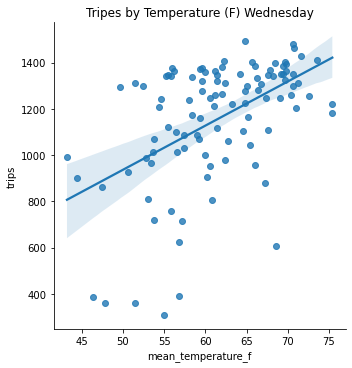

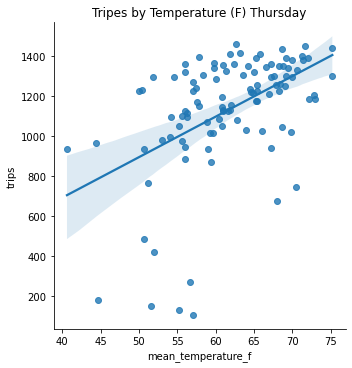

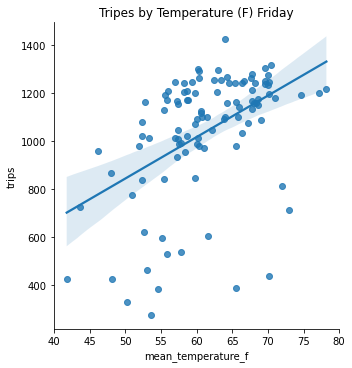

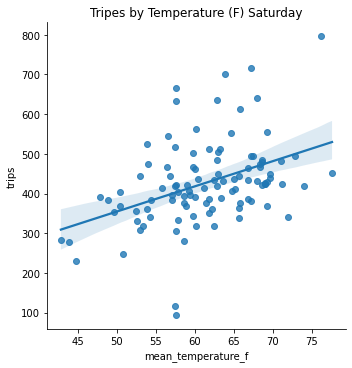

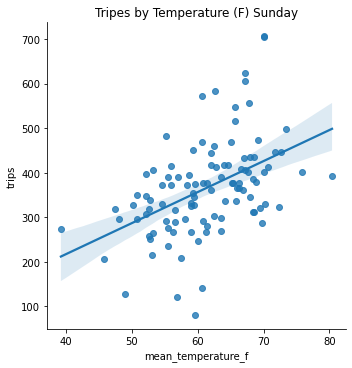

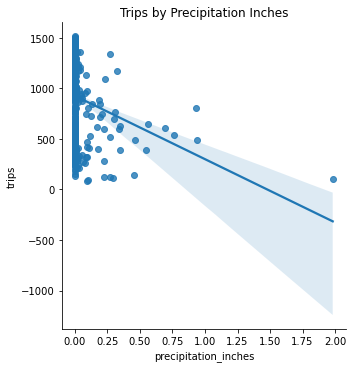

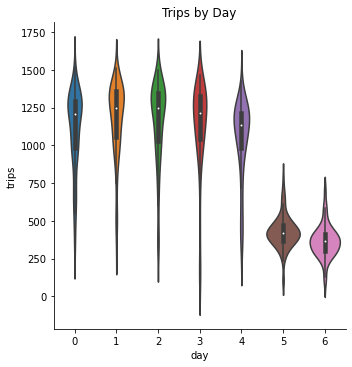

In [177]:
# Get correlation info
factors = ['trips', 'mean_temperature_f', 'mean_dew_point_f','mean_humidity', 'mean_sea_level_pressure_inches', 
           'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover', 
           'wind_dir_degrees']
cor = weather_by_date[factors].corr()
cor = round(cor, 2)
sns.heatmap(cor, annot=True)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot correlation graphs
for i in range(7):
    sns.lmplot(x="mean_temperature_f", y="trips", data=weather_by_date.loc[(weather_by_date["day"] == i)]).set(title="Tripes by Temperature (F) " + days[i])

sns.lmplot(x="precipitation_inches", y="trips", data=weather_by_date).set(title="Trips by Precipitation Inches")
sns.lmplot(x="mean_dew_point_f", y="trips", data=weather_by_date).set(title="Trips by Dew Point (F)")


[Text(0.5, 1.0, 'Trips by Day of Week')]

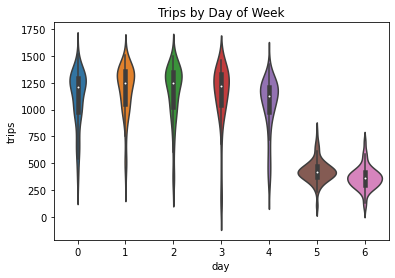

In [179]:
# Violin plots by day
sns.violinplot(data=weather_by_date, x="day", y="trips").set(title="Trips by Day of Week")

In [211]:
# train model
# imports
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

x = weather_by_date.drop(["trips", 'max_gust_speed_mph'],axis=1)
y = weather_by_date["trips"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.6083442642501362
mean_sqrd_error is== 65835.41764436648
root_mean_squared error of is== 256.584133656714


In [234]:
df = pd.merge(trip, weather, left_on=['date','zip_code'], right_on = ['date','zip_code'])
df["day"] = pd.to_datetime(df["start_date"]).dt.dayofweek
df

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,day
0,4275,883,8/29/2013 11:43,Mechanics Plaza (Market at Battery),75,8/29/2013 11:57,South Van Ness at Market,66,626,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,,286.0,3
1,4290,309,8/29/2013 11:58,Powell Street BART,39,8/29/2013 12:03,Market at 10th,67,496,Customer,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,,286.0,3
2,4319,899,8/29/2013 12:10,South Van Ness at Market,66,8/29/2013 12:25,Beale at Market,56,546,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,,286.0,3
3,4442,474,8/29/2013 12:56,Washington at Kearney,46,8/29/2013 13:04,Market at Sansome,77,607,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,,286.0,3
4,4454,340,8/29/2013 13:05,Market at Sansome,77,8/29/2013 13:10,Washington at Kearney,46,590,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0.0,4.0,,286.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95294,911861,232,8/31/2015 8:06,San Francisco Caltrain (Townsend at 4th),70,8/31/2015 8:10,Townsend at 7th,65,267,Subscriber,...,10.0,10.0,18.0,4.0,20.0,0.0,0.0,,282.0,0
95295,912126,251,8/31/2015 9:05,Mezes Park,83,8/31/2015 9:10,Redwood City Caltrain Station,22,699,Subscriber,...,10.0,10.0,18.0,4.0,20.0,0.0,0.0,,282.0,0
95296,913156,176,8/31/2015 18:20,Townsend at 7th,65,8/31/2015 18:23,San Francisco Caltrain 2 (330 Townsend),69,508,Subscriber,...,10.0,10.0,18.0,4.0,20.0,0.0,0.0,,282.0,0
95297,913244,225,8/31/2015 18:55,Redwood City Caltrain Station,22,8/31/2015 18:59,Mezes Park,83,699,Subscriber,...,10.0,10.0,18.0,4.0,20.0,0.0,0.0,,282.0,0


In [233]:
weather

array([94107, 94063, 94301, 94041, 95113])

## Conclusion